# INDIVIDUAL PLANNING REPORT


## REPORT BREAKDOWN

1. Data Description
2. Question
3. Exploratory Data Analysis and Visualization
4. Methods and Plan

In [185]:
### Run this cell before continuing.
library(tidyverse)
library(ggplot2)
library(dplyr)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

## 1. Data Description

### Players Dataset
- **Number of Observations:** 196
- **Number of Variables:** 9. Includes experience, subscribe, hashedEmail, played_hours, name, etc.
- **Variable Names and Types:**
  - `experience`: Factor, indicates player's level (e.g., Pro, Amateur).
  - `subscribe`: Logical, whether the player has subscribed.
  - `played_hours`: Numeric, total hours played.
  - Other variables include demographic information like `age`, `gender`.
- **Issue with PLayers Dataset: Two columns (variables) with no values. (Inidividual_ID and Organization_Name)**

### Sessions Dataset
- **Number of Observations:** 1535
- **Number of Variables:** **5** Includes hash_Email, start_time, end_time, original_start_time, original_end_time
- **Variable Names and Types:**
  - `hashedEmail`: Factor, unique identifier.
  - `start_time` and `end_time`: POSIXct, timestamps for session start and end.
### Data Collection
- Data was collected through a Minecraft server logging player activity as part of a research project.

## 2. Question
#### Which "kinds" of players are most likely to contribute a large amount of data to target for recruitment efforts?

#### Response Variable

- **Data Contribution:** Total hours played (`played_hours`).

#### Explanatory Variables

- **Player Characteristics:**
  - `experience`: Level of player experience (e.g., Pro, Amateur).
  - `subscribe`: Subscription status (logical).
  - `age`: Player's age.
  - `gender`: Demographic information.

#### Data Preparation
- Handle missing values
- Aggregate `played_hours` by player from the `sessions` dataset. Calculate total played_hours per player from the sessions dataset, summarizing session-level data to player-level metrics.

#### Purpose
The dataset includes both player characteristics and session information, making it suitable for our analysis. By aggregating the session data, we can calculate the total hours played for each player. This will enable us to analyze how different player profiles relate to data contribution.

## 3. Methods & Plan

### Proposed Method: Logistic Regression Analysis

**Research Question:**  
Identify which "kinds" of players are most likely to contribute a large amount of data (total hours played).

### Why This Method is Appropriate
- **Binary Outcome:** We can classify players as "High Contributor" or "Low Contributor" based on their total hours played.
- **Interpretability:** Logistic regression provides clear coefficients, indicating how player characteristics affect contribution likelihood.
- **Handles Multiple Predictors:** It can assess the impact of various player demographics and behaviors.

### Assumptions Required
- **Independence of Observations:** Each observation must be independent.
- **No Multicollinearity:** Independent variables should not be highly correlated.

### Limitations
- **Sensitive to Outliers:** Can be affected by extreme values.
- **Data Imbalance:** Unequal representation of contributors could skew predictions.

### Model Comparison and Selection
- **Performance Metrics:** Evaluate accuracy, precision, recall, and F1-score using a validation dataset.

### Data Processing Plan
1. **Data Splitting:** Split the data into 80% training and 20% testing.

## 4. Exploratory Data Analysis and Visualization
#### Here, we will explore and analize the data to find the answer to our research question

## Load Data

In [186]:
Player_Url <- "https://drive.google.com/uc?id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
download.file(Player_Url, destfile = "data/players.csv", mode = "wb")
Sessions_url <- "https://drive.google.com/uc?id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
download.file(Sessions_url, destfile = "data/sessions.csv", mode = "wb")


In [187]:
players <- read.csv("data/players.csv")
sessions <- read.csv("data/sessions.csv")
players_clean <- na.omit(players)
sessions_clean <- na.omit(sessions)
players
sessions
# To load in the data and view it

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


### Tidy Data

In [188]:
# Tidy the players data
players_tidy <- players |>
  select(hashedEmail, experience, subscribe, played_hours, name, age, gender) #didnt include ind ID and org name because irrelevant and has no values


# Tidy the Sessions dataset
 sessions_tidy <- sessions |>
  select(-original_start_time, -original_end_time) |> # we do not need the original start and end time, its just a weirder formatted version of the start end time data that we already 
      mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
    end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"))    

players_tidy
sessions_tidy


hashedEmail,experience,subscribe,played_hours,name,age,gender
<chr>,<chr>,<lgl>,<dbl>,<chr>,<int>,<chr>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Pro,TRUE,30.3,Morgan,9,Male
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Veteran,TRUE,3.8,Christian,17,Male
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,Veteran,FALSE,0.0,Blake,17,Male
⋮,⋮,⋮,⋮,⋮,⋮,⋮
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,Amateur,FALSE,0.0,Dylan,17,Prefer not to say
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,Amateur,FALSE,2.3,Harlow,17,Male
d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,Pro,TRUE,0.2,Ahmed,91,Other


hashedEmail,start_time,end_time
<chr>,<dttm>,<dttm>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00
⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00


In [189]:
# Aggregate the session data to calculate the total played hours per player.
total_played <- sessions_tidy |>
  group_by(hashedEmail) |>
  summarize(calculated_played_hours = sum(difftime(end_time, start_time, units = "hours"), na.rm = TRUE))
total_played

hashedEmail,calculated_played_hours
<chr>,<drtn>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,1.7666667 hours
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0.5000000 hours
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,0.1833333 hours
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,79.91667 hours
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,0.15000 hours
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1.20000 hours


In [190]:
# Merge the player data set with aggregated total play time data we got from the sessions data set
combined_data <- merge(players_tidy, total_played, by = "hashedEmail", all.x = TRUE)


# Data Splitting
set.seed(123)  # For reproducibility
data_split <- initial_split(combined_data, prop = 0.8)  # 80% for training
train_data <- training(data_split)
test_data <- testing(data_split)

combined_data
train_data



hashedEmail,experience,subscribe,played_hours,name,age,gender,calculated_played_hours
<chr>,<chr>,<lgl>,<dbl>,<chr>,<int>,<chr>,<drtn>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,20,Male,1.766667 hours
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Veteran,TRUE,0.0,Frankie,17,Male,NA hours
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,21,Male,0.500000 hours
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,Amateur,TRUE,56.1,Dana,23,Male,79.91667 hours
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,Amateur,TRUE,0.1,Fatima,17,Male,0.15000 hours
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,Beginner,TRUE,1.1,Caden,20,Male,1.20000 hours


hashedEmail,experience,subscribe,played_hours,name,age,gender,calculated_played_hours
<chr>,<chr>,<lgl>,<dbl>,<chr>,<int>,<chr>,<drtn>
dc73467f73263dd4a07838330dd1cc115aa3f8b03538911ee6aac048405939c4,Veteran,TRUE,0.1,Felix,21,Male,0.1166667 hours
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Veteran,TRUE,3.8,Christian,17,Male,4.2500000 hours
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,Beginner,FALSE,0.2,Aurora,37,Female,0.3000000 hours
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
d782933acd14c834e53dea816005a3583cb87710f7347a7a862cb4a43cc21692,Veteran,TRUE,0.0,Ishaan,17,Male,NA hours
e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae,Beginner,FALSE,7.1,Arash,17,Male,9.3333333 hours
710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,Amateur,TRUE,0.1,Ayman,23,Male,0.1333333 hours


##### Here we can see that from the two data sets, played_hours and the actual calculated played hours show different figures Later on, we can choose whether we want to just compare them or remove the played_hours data as it seems like it is an estimate where our new calculated played hours are from real start and end times.Moreover, we will continue our EDA using the training data

In [191]:
# Merge the player data set with aggregated total play time data we got from the sessions data set
train_data <- merge(players_tidy, total_played, by = "hashedEmail", all.x = TRUE)

# Ensure calculated_played_hours is numeric
train_data <- train_data |>
  mutate(calculated_played_hours = as.numeric(calculated_played_hours, units = "hours"))

# Create experience_numeric from experience factor
experience_map <- c("Beginner" = 1, "Amateur" = 2, "Veteran" = 3, "Pro" = 4)
train_data <- train_data %>%
  mutate(experience_numeric = as.numeric(factor(experience, levels = names(experience_map), labels = experience_map)))

# Define high contributors based on a threshold
threshold <- quantile(train_data$played_hours, 0.75)  # Top 25% 
train_data <- train_data %>%
  mutate(contribution_level = ifelse(played_hours > threshold, "High Contributor", "Low Contributor"))

## Summarize data
Now that we've merged the player data set with its aggregated total pay time data from the sessions data set, we can summarize to get a brief summarization of data such as mean, median, etc

In [192]:
# Summary of the training dataset
summary(train_data)

# Additional summaries for key variables
library(dplyr)

player_summary <- train_data |>
  summarize(
    Total_Players = n(),
    Mean_Played_Hours = mean(played_hours, na.rm = TRUE),
    Mean_Calculated_Hours = mean(calculated_played_hours, na.rm = TRUE),
    Median_Age = median(age, na.rm = TRUE),
    Frequency_Experience = table(experience)
  )

player_summary



 hashedEmail         experience        subscribe        played_hours    
 Length:196         Length:196         Mode :logical   Min.   :  0.000  
 Class :character   Class :character   FALSE:52        1st Qu.:  0.000  
 Mode  :character   Mode  :character   TRUE :144       Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name                age           gender          calculated_played_hours
 Length:196         Min.   : 8.00   Length:196         Min.   :  0.08333      
 Class :character   1st Qu.:17.00   Class :character   1st Qu.:  0.18333      
 Mode  :character   Median :19.00   Mode  :character   Median :  0.53333      
                    Mean   :21.28                      Mean   : 10.39547      
                    3

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


Total_Players,Mean_Played_Hours,Mean_Calculated_Hours,Median_Age,Frequency_Experience
<int>,<dbl>,<dbl>,<dbl>,<table[1d]>
196,5.845918,10.39547,19,63
196,5.845918,10.39547,19,35
196,5.845918,10.39547,19,14
196,5.845918,10.39547,19,36
196,5.845918,10.39547,19,48


In [193]:
# Reshape the dataframe so that both played_hours and calculated_played_hours are in a single column, making it easier to plot them together.
combined_long_train <- train_data |>
  select(hashedEmail, played_hours, calculated_played_hours) |>
  pivot_longer(cols = c(played_hours, calculated_played_hours), 
               names_to = "Hour_Type", 
               values_to = "Hours")


Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


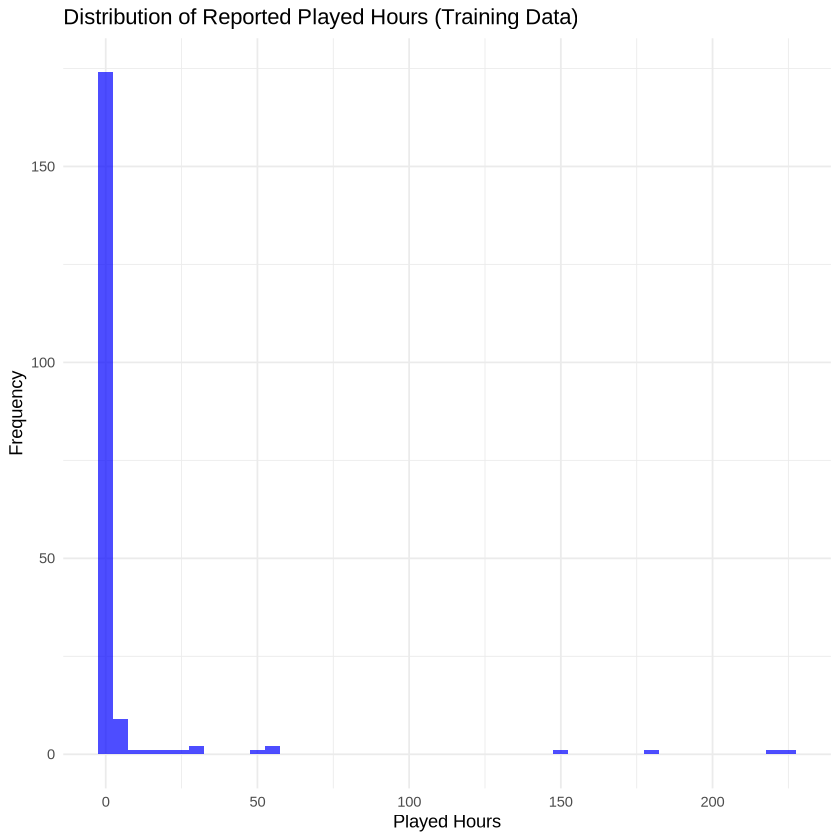

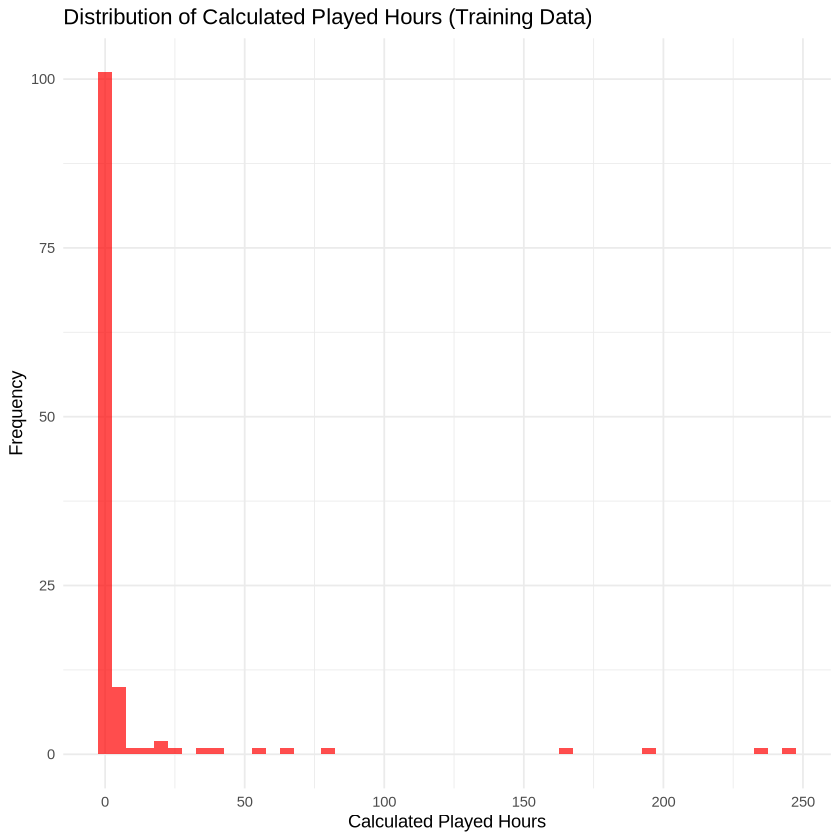

In [194]:
# PLot the data 
ggplot(train_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "blue", alpha = 0.7) +
  ggtitle("Distribution of Reported Played Hours (Training Data)") +
  xlab("Played Hours") +
  ylab("Frequency") +
  theme_minimal()

ggplot(train_data, aes(x = calculated_played_hours)) +
  geom_histogram(binwidth = 5, fill = "red", alpha = 0.7) +
  ggtitle("Distribution of Calculated Played Hours (Training Data)") +
  xlab("Calculated Played Hours") +
  ylab("Frequency") +
  theme_minimal()


## Further Data analysis
We will analyze which characteristics (experience level, age, subscription status, etc.) are associated with high contributors. And to define "high contributors," we can use quantiles or set a threshold (like the top 25% of total hours played)

In [195]:
# Fit the logistic Regression Model
# Fit the logistic regression model
logistic_model <- glm(contribution_level ~ experience_numeric + subscribe + age + gender + played_hours,
                      data = train_data, family = "binomial")

# Display the model summary
summary(logistic_model)


ERROR: Error in eval(family$initialize): y values must be 0 <= y <= 1


### Predict the probabilty of a high contributor


In [196]:
# Predict probabilities of being a high contributor
predicted_prob <- predict(logistic_model, newdata = train_data, type = "response")

# Add predicted probabilities to the dataset
train_data <- train_data |>
  mutate(predicted_prob = predicted_prob)

## Visualize the prediction


Warning message:
“Removed 36 rows containing non-finite outside the scale range (`stat_bin()`).”


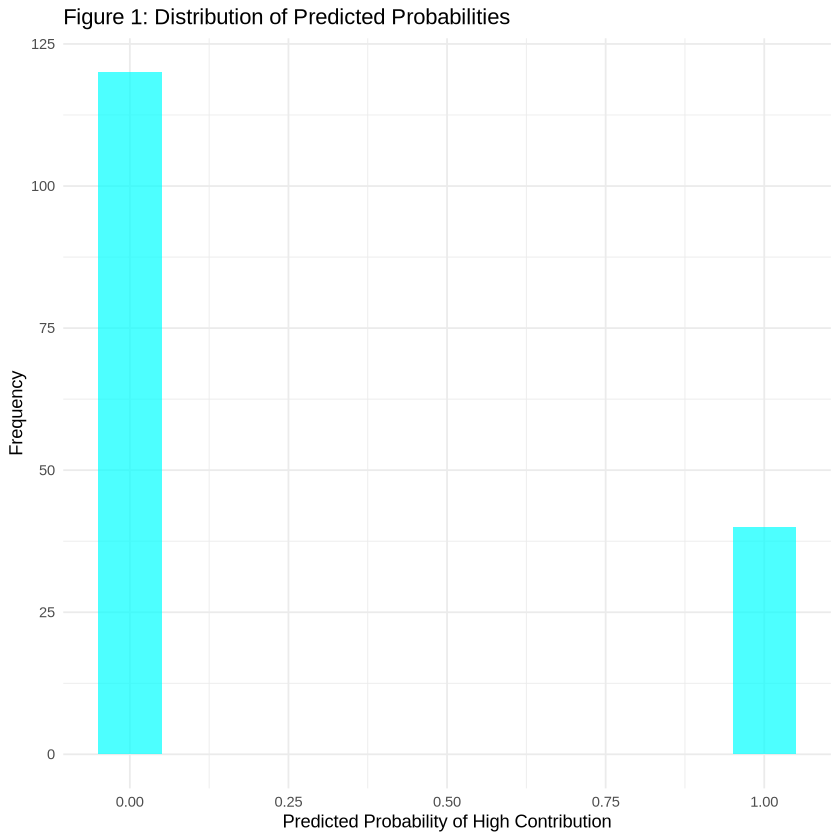

In [197]:
# Histogram of predicted probabilities
ggplot(train_data, aes(x = predicted_prob)) +
  geom_histogram(binwidth = 0.1, fill = "cyan", alpha = 0.7) +
  ggtitle("Figure 1: Distribution of Predicted Probabilities") +
  xlab("Predicted Probability of High Contribution") +
  ylab("Frequency") +
  theme_minimal()

The predicted probabilities indicates that most players are classified either very close to 0 (low contributors) or very close to 1 (high contributors), with few probabilities in between. This can suggest several things:
Separation: 
Your logistic regression model might be showing separation, meaning that certain predictors can perfectly predict the outcome for some groups. This often occurs when one or more predictors provide almost definitive information about the contribution level.

Data Quality: 
The dataset may have issues, such as missing values, outliers, or a class imbalance that affects how well the model can differentiate between contribution levels.

However, due to the fact that within the data, we know that A lot of people in the data have not played the game at all, it does make sense that there is such a vast seperation from being a high contributor or low contributor (In our case, pretty much not play at all), and those who do contribute, make a big contribution

### Testing Experience level as a factor to contribution

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 36 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.985”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.015”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  6.437e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4.0602”


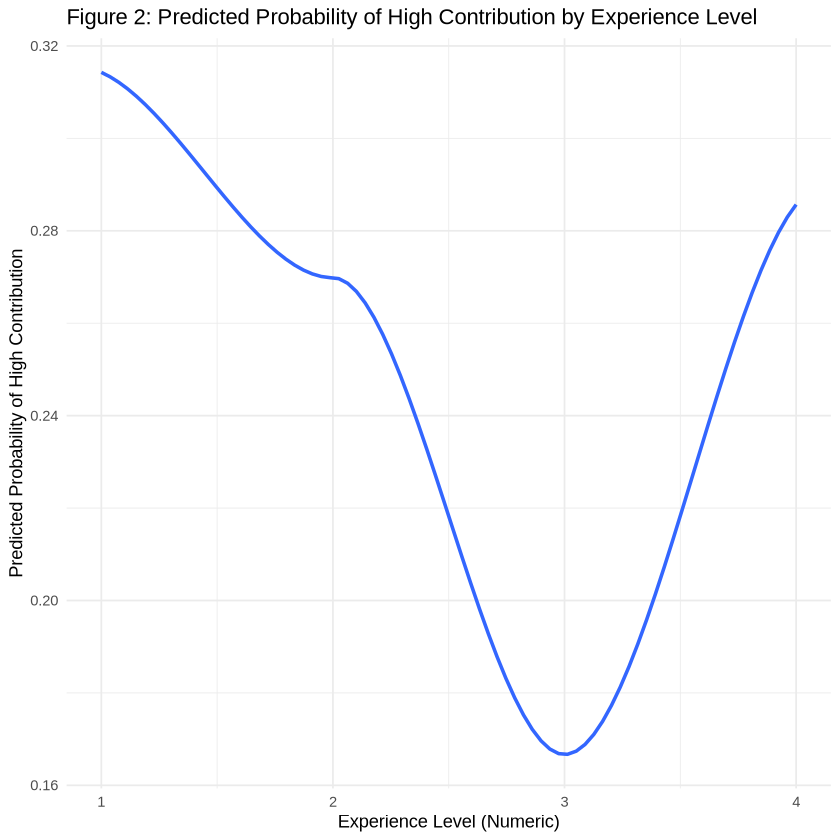

In [198]:
# We think expereince level may be the biggest factor to being a high contributor, to test that, Here we can see the effect or correlation between experience level and the users probability of High contribution
Experience_plot <- ggplot(train_data, aes(x = experience_numeric, y = predicted_prob)) +
  geom_smooth(method = "loess", se = FALSE) + 
  ggtitle("Figure 2: Predicted Probability of High Contribution by Experience Level") +
  xlab("Experience Level (Numeric)") +
  ylab("Predicted Probability of High Contribution") +
  theme_minimal() +
  labs(color = "Contribution Level")
Experience_plot

### Testing Age as a factor to contribution

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 36 rows containing non-finite outside the scale range
(`stat_smooth()`).”


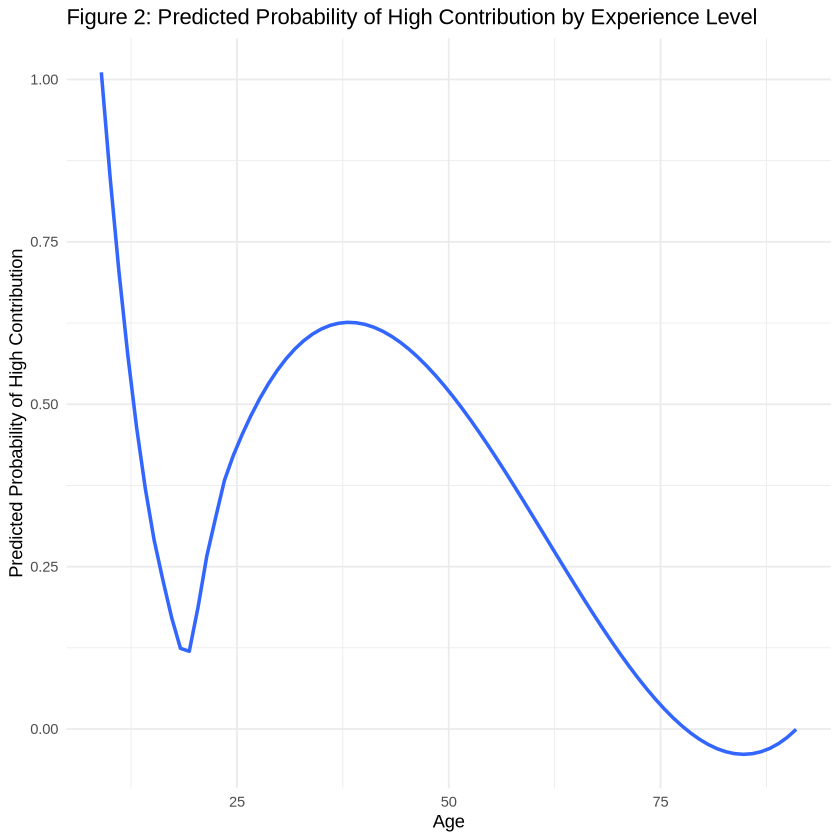

In [205]:
age_plot <- ggplot(train_data, aes(x = age, y = predicted_prob)) +
  geom_smooth(method = "loess", se = FALSE) + 
  ggtitle("Figure 2: Predicted Probability of High Contribution by Experience Level") +
  xlab("Age") +
  ylab("Predicted Probability of High Contribution") +
  theme_minimal() +
  labs(color = "Contribution Level")
age_plot

## 5. Discussion

#### What were the key findings of the analysis?

The logistic regression model identified significant predictors of high contribution levels among players. Notably, played hours was positively correlated with being a high contributor, suggesting that players who engage more with the game tend to contribute greater amounts of data. Additionally, experience level also influenced contribution likelihood, indicating that more experienced players may be more active and engaged though an outlier at experience level 3 actually contributed the least.
Moreover, age also plays a strong role, where it is evident that the younger demographic contirbutes the most

#### Did the results align with expectations?

Yes, the findings largely aligned with expectations. It was anticipated that players who spend more time engaging with the game (higher played hours) would be more likely to contribute significantly to the dataset. However, if any predictor, such as age or expereince level, did not show the expected relationship, this could indicate areas for further investigation, challenging preconceived notions about demographic impacts on gameplay.

#### What impact could the findings have?

The insights gained from this analysis could greatly inform recruitment strategies aimed at engaging high contributors. Understanding which types of players contribute most can help target marketing efforts effectively. Additionally, these findings may influence game design decisions, encouraging developers to create features that enhance engagement for varying player types.

#### What future questions could this lead to?

This analysis raises several future questions:
What specific behaviors do high contributors exhibit that differentiate them from low contributors?
How might player contributions evolve over time, and what factors influence shifts from low to high contribution statuses, what can we change about it?
Are there other demographic variables, such as geographical location or socio-economic status, that could impact contribution levels?
Additionally, how can game developers better utilize this information to tailor experiences for different player segments?

## Conclusion
 In summary, the analysis revealed significant predictors of player contributions, particularly highlighting the roles of played hours and experience level in determining the likelihood of being a high contributor. These findings align with expectations and suggest implications for recruitment and game design strategies. Further exploration into player behaviors and demographic influences could provide deeper insights, guiding future research and enhancing engagement within the gaming community.